### Dados de óbito do Brasil por ano/mês de processamento por unidade da federação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados_obito = pd.read_csv('https://raw.githubusercontent.com/xandeea/BootCamp-Dados-Alura/main/dados/dados_obito.csv', encoding="ISO-8859-1", sep=";",
                          skiprows=3, skipfooter=11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [3]:
dados_obito.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8343,8996,8453,9418,9725,9731,9047,7264,7020,1437282
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381,658201
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17511,17719,18004,17727,18593,17981,16778,2340367
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929,484178
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,...,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32154,33399,38814,36143,37169,38225,37065,37334,37223,37960,38363,41832,38038,36372,32335,6680739


In [4]:
dados_obito.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
23,50 Mato Grosso do Sul,9636,11206,12012,12609,13120,14507,13668,13334,14023,13170,12013,11623,12406,12076,13079,13510,13623,13430,13898,13435,13642,13490,12874,12574,13509,13847,13980,13845,14182,13982,13387,13469,13962,13512,13299,13076,12774,12251,13386,...,14969,14634,13642,14179,13788,13695,13117,14192,14263,13738,15213,15039,15049,15751,15505,15057,15188,14073,14234,14709,15080,15059,13199,12779,12150,12377,12149,11795,11682,12353,11512,12734,13937,13664,13172,13758,14622,14045,13854,2210097
24,51 Mato Grosso,9975,14329,14124,14822,14620,16373,15433,15374,14070,16011,13772,14256,13973,13427,16026,15127,15967,16037,15171,14993,14259,15312,14639,14179,14692,14565,15505,15382,15690,14797,15572,15192,15347,15186,15126,13955,14669,14179,14492,...,16184,16499,15367,16147,15868,15175,14846,14849,14785,16476,16261,17262,16278,16422,17444,16358,17215,16051,15752,15222,15545,15000,12819,13320,12219,12943,14014,13777,15017,13968,14133,14857,14498,15252,15308,15487,15051,16345,14040,2503188
25,52 Goiás,26465,34641,32161,32994,32742,27990,30697,30863,32003,30002,24986,27104,26411,28824,30928,31076,32108,30969,30315,30457,30352,31111,30799,30463,30912,31637,32747,31502,31871,30591,29894,31291,31608,30466,30335,28762,29911,30014,32014,...,27290,27002,27281,27826,27313,26394,26844,27096,26207,27783,28604,29738,28923,29715,29813,29175,29984,28449,27449,27430,26997,27242,22536,23196,22667,24240,26063,25362,26569,25313,25671,26338,25287,28456,27251,28103,27683,26788,25788,4679127
26,53 Distrito Federal,7754,12057,14746,14754,16759,17907,17778,18935,16208,19644,15021,16454,14697,12286,15658,15366,17818,18101,15968,16164,15826,16366,14682,13317,16298,13506,16704,16422,17032,15195,15558,15850,15067,14737,14643,13775,14453,14410,16339,...,19990,20646,20828,18002,16142,15461,13892,18401,18473,21607,19459,20326,18765,19976,21838,17908,18218,16924,17719,20213,19218,21460,18769,16481,16610,16360,16438,15747,17162,16379,17706,19145,17669,20365,20840,19554,20114,19588,19786,2658992
27,Total,651615,824348,889296,916303,944567,963816,973736,959556,955490,948185,856024,860667,829164,845575,944889,928836,964271,944227,964845,961473,955836,952503,936962,900228,919891,882894,968799,964479,981715,945855,958727,965996,952785,942332,945457,929035,919607,909568,957377,...,997341,1014144,1020329,989064,1007504,968737,933348,981163,947852,997216,1016479,1064017,1017673,1050891,1057626,1029394,1052862,999315,967238,1000995,967287,956433,775289,786624,791897,848101,858902,867006,908345,902488,871584,898255,893243,938446,912632,945140,948457,932481,882719,154151320


In [5]:
dados_obito = dados_obito.drop("Total", axis=1)
dados_obito.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8343,8996,8453,9418,9725,9731,9047,7264,7020
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17511,17719,18004,17727,18593,17981,16778
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,...,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32154,33399,38814,36143,37169,38225,37065,37334,37223,37960,38363,41832,38038,36372,32335


In [6]:
# Retirando os números da coluna Unidade da Federação
dados_obito['Unidade da Federação'] = dados_obito['Unidade da Federação'].str.slice(start=3)

In [7]:
dados_obito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Columns: 165 entries, Unidade da Federação to 2021/Ago
dtypes: int64(162), object(3)
memory usage: 36.2+ KB


In [8]:
# Verificando quais colunas não estão com todos os dados númericos
dados_obito.dtypes[dados_obito.dtypes != int]

Unidade da Federação    object
2009/Set                object
2021/Ago                object
dtype: object

In [9]:
dados_obito['2009/Set'] = pd.to_numeric(dados_obito['2009/Set'], errors="coerce")
dados_obito['2021/Ago'] = pd.to_numeric(dados_obito['2021/Ago'], errors="coerce")

In [10]:
dados_obito = dados_obito.set_index("Unidade da Federação")
dados_obito

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842.0,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,...,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8343,8996,8453,9418,9725,9731,9047,7264,7020.0
Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,NaN,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,...,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381.0
Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917.0,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,...,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17511,17719,18004,17727,18593,17981,16778.0
Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049.0,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,...,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929.0
Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025.0,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,43663,...,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32154,33399,38814,36143,37169,38225,37065,37334,37223,37960,38363,41832,38038,36372,32335.0
Amapá,2386,2650,2262,2259,1555,2611,2733,2808,3154,3502,2801,2843,2985,3417,3285,3657,3118,3033,3263,3169,3235.0,3202,3358,3018,3111,3000,2862,2769,2849,3100,3101,2920,3289,2970,3300,3313,3040,2971,2511,3073,...,2504,3233,2897,3506,3693,3921,3438,3591,3640,3463,3468,3468,3543,3186,3427,3546,3334,3330,3336,3135,3119,3213,2420,2017,2118,2350,3010,3072,2945,2367,2398,2944,2889,3333,3360,3300,3355,3469,3411,NaN
Tocantins,6665,7638,9491,8330,8627,8166,8706,8315,8621,8050,8192,7527,7732,8400,8562,8347,8694,8741,8229,8329,8236.0,8356,8221,7675,8489,8411,8717,8880,9063,8813,8753,8913,8797,8667,8648,7888,8660,8722,8908,9161,...,5851,6254,5783,5917,5388,5357,5249,5209,5698,6112,6142,6428,6849,6166,7066,7477,8342,7301,6442,7136,7522,6861,6890,6247,6331,6098,6748,6313,6117,6192,6172,5612,6273,6477,7094,6856,6842,7109,6938,6921.0
Maranhão,21417,25681,26368,28277,27902,28708,29416,28910,27968,29766,26784,26689,25488,27685,28238,

In [11]:
dados_obito = dados_obito.drop("al")

In [12]:
# Para fazer a análise, será selecionado o meu estado(SC) com os outros estados da região Sul
dados_obito_sul = dados_obito.loc[['Paraná', 'Santa Catarina', 'Rio Grande do Sul']]
dados_obito_sul


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Paraná,51180,61926,63178,60734,60660,63040,62952,61885,62168,63107,58092,60592,61571,60535,64642,64514,65056,63470,65637,64540,64183.0,64462,62807,63107,60926,60085,65432,65822,66503,65982,65939,66679,66009,65749,65832,63829,64757,62518,63744,65596,...,73085,72760,74451,74103,73357,74028,74335,69396,72424,70915,72807,72330,75849,73282,75158,73834,74501,74980,74003,69531,72379,73852,67487,55136,59843,51876,55264,58442,59155,63596,62996,56910,58814,63332,60422,63352,62625,63453,63935,65906.0
Santa Catarina,23728,30418,30982,30729,31003,33146,32894,32772,32280,33484,28297,30016,31775,29396,33671,32252,33055,32362,34494,33484,34500.0,33784,33206,29442,31924,28873,33293,32592,31980,31584,32339,33591,32410,32210,32586,33701,30497,31899,32726,32267,...,41710,42888,42849,43170,41185,41816,39606,38206,40755,38940,39919,41215,44436,42921,45213,44708,44074,45214,42794,40567,39972,41665,39419,31493,31181,32801,32084,32390,34272,35430,36858,35668,36702,36470,35782,34736,35913,37769,37210,35596.0
Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62577.0,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,...,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56763,54329,55963,55321,57903,60836,60496,61165.0


In [13]:
# Deixando sem casas decimais por se tratarem de números inteiros (nº total de óbitos)
pd.options.display.float_format = "{:.0f}".format

In [14]:
dados_obito_sul.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
count,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
mean,38879,52274,51796,51842,49445,51482,53375,52658,51852,52766,47816,49832,49217,48591,53665,53027,53240,52438,54656,54015,53753,53592,52262,50772,50489,48562,52903,53106,53938,52389,53725,54296,52811,52689,52863,52682,50144,49100,51833,51174,...,59098,59228,60451,60599,59374,59520,58394,55725,57571,56379,57660,58612,61986,60512,62845,62268,61458,62909,59825,57129,58704,59041,56805,45873,47067,45225,46850,47780,48655,52747,52379,49463,50760,51377,50722,51136,52147,54019,53880,54222
std,13946,18970,18052,18360,16095,16059,17750,17236,16958,16713,16912,17183,15536,16788,17343,18025,17565,17414,17484,17783,16693,17181,16534,18548,16119,17134,17200,17935,19082,18298,18583,18046,17920,17958,17787,16521,17676,15656,16714,17111,...,15961,15133,16106,15836,16493,16342,17539,15947,15925,16184,16597,15880,16028,15744,15665,15461,15671,15660,15799,14923,16785,16246,15187,12625,14582,10768,12829,13655,12888,15156,13742,11959,12217,13672,13129,14760,14256,14134,14539,16304
min,23728,30418,30982,30729,31003,33146,32894,32772,32280,33484,28297,30016,31775,29396,33671,32252,33055,32362,34494,33484,34500,33784,33206,29442,31924,28873,33293,32592,31980,31584,32339,33591,32410,32210,32586,33701,30497,31899,32726,32267,...,41710,42888,42849,43170,41185,41816,39606,38206,40755,38940,39919,41215,44436,42921,45213,44708,44074,45214,42794,40567,39972,41665,39419,31493,31181,32801,32084,32390,34272,35430,36858,35668,36702,36470,35782,34736,35913,37769,37210,35596
25%,32728,46172,46106,45732,43838,45704,47923,47328,46694,47596,42678,44452,43040,42618,48176,47283,47332,46922,49165,48753,48538,48156,46989,44605,45270,42800,46638,46748,47655,45593,47618,48105,46212,46159,46379,47108,42838,42392,45878,43963,...,52104,52462,53451,53848,52382,52266,50424,48890,50144,49112,50086,51753,55054,54128,56689,56486,54936,56874,52736,50928,51866,51635,51464,41242,40679,41900,42643,42450,43406,47322,47071,45740,46732,45400,45872,45028,46908,49302,48853,48380
50%,41729,61926,61229,60734,56673,58261,62952,61885,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,...,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56763,54329,55963,55321,57903,60836,60496,61165
75%,46454,63202,62204,62398,58666,60650,63616,62600,61638,62407,57575,59740,57938,58188,63662,63414,63332,62476,64736,64281,63380,63496,61790,61438,59772,58406,62708,63362,64916,62792,64418,64649,63012,62928,63002,62172,59968,57701,61386,60628,...,67792,67398,69252,69314,68468,68372,67788,64484,65978,65099,66530,67310,70761,69308,71662,71048,70150,71757,68340,65410,68070,67728,65498,53064,55010,51437,54233,55476,55847,61405,60140,56360,57788,58830,58192,59336,60264,62144,62216,63536
max,51180,64477,63178,64063,60660,63040,64280,63316,62168,63107,58092,60592,61571,60535,64642,64514,65056,63470,65637,64540,64183,64462,62807,63107,60926,60085,65432,65822,6650

Text(0.5, 1.0, 'Número de óbitos nos estados da Região Sul do Brasil')

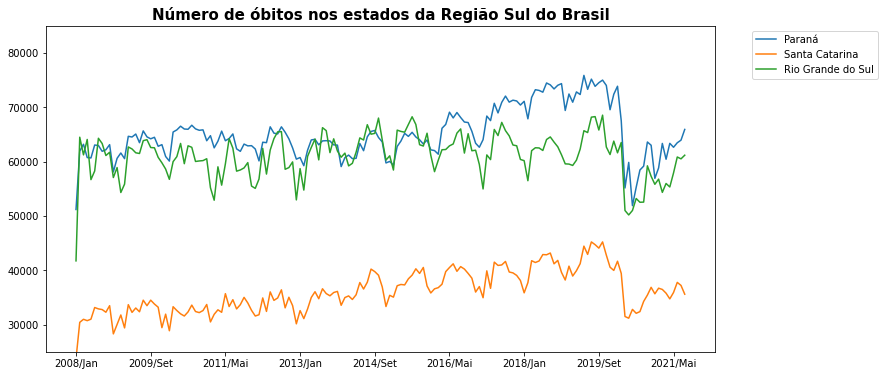

In [15]:
dados_obito_sul.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(25000, 85000)
plt.title("Número de óbitos nos estados da Região Sul do Brasil",fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Número de óbitos nos estados da Região Sul do Brasil')

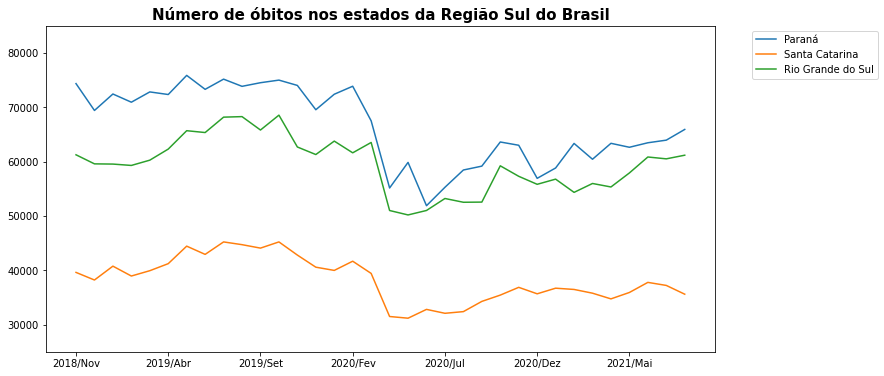

In [16]:
# Selecionando uma parte do gráfico que chama a atenção pela grande queda(próximo de 2020)
meses_filtrados = dados_obito_sul.columns[130:]
dados_obito_sul[meses_filtrados].T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(25000, 85000)
plt.title("Número de óbitos nos estados da Região Sul do Brasil", fontweight="bold", fontsize=15)

In [17]:
dados_obito_sul.T.loc['2019/Set':'2020/Set']

Unidade da Federação,Paraná,Santa Catarina,Rio Grande do Sul
2019/Set,74501,44074,65798
2019/Out,74980,45214,68534
2019/Nov,74003,42794,62678
2019/Dez,69531,40567,61288
2020/Jan,72379,39972,63760
2020/Fev,73852,41665,61605
2020/Mar,67487,39419,63508
2020/Abr,55136,31493,50991
2020/Mai,59843,31181,50177
2020/Jun,51876,32801,50998


In [18]:
dif_mar_abr = dados_obito_sul.loc[:,['2020/Mar','2020/Abr']]
dif_mar_abr['diferenca_março_abril'] = dif_mar_abr['2020/Mar'] - dif_mar_abr['2020/Abr']
dif_mar_abr

,2020/Mar,2020/Abr,diferenca_março_abril
Unidade da Federação,,,
Paraná,67487,55136,12351
Santa Catarina,39419,31493,7926
Rio Grande do Sul,63508,50991,12517


In [19]:
# Verificando a diferença entre os meses de março e abril de 2020 em todo o país
dif_mar_abr = dados_obito.loc[:,['2020/Mar', '2020/Abr']]
dif_mar_abr['diferenca_março_abril'] = dif_mar_abr['2020/Mar'] - dif_mar_abr['2020/Abr']
dif_mar_abr['diferenca_em_porcentagem'] = (dif_mar_abr['2020/Mar']-dif_mar_abr['2020/Abr'])*100/dif_mar_abr['2020/Mar']
dif_mar_abr = dif_mar_abr.sort_values(by=['diferenca_em_porcentagem'], ascending=False)
dif_mar_abr

,2020/Mar,2020/Abr,diferenca_março_abril,diferenca_em_porcentagem
Unidade da Federação,,,,
Pernambuco,44264,32493,11771,27
São Paulo,202819,152829,49990,25
Piauí,15867,12305,3562,22
Pará,39504,30762,8742,22
Acre,3743,2943,800,21
Santa Catarina,39419,31493,7926,20
Maranhão,35227,28281,6946,20
Rio Grande do Sul,63508,50991,12517,20
Rondônia,9552,7674,1878,20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

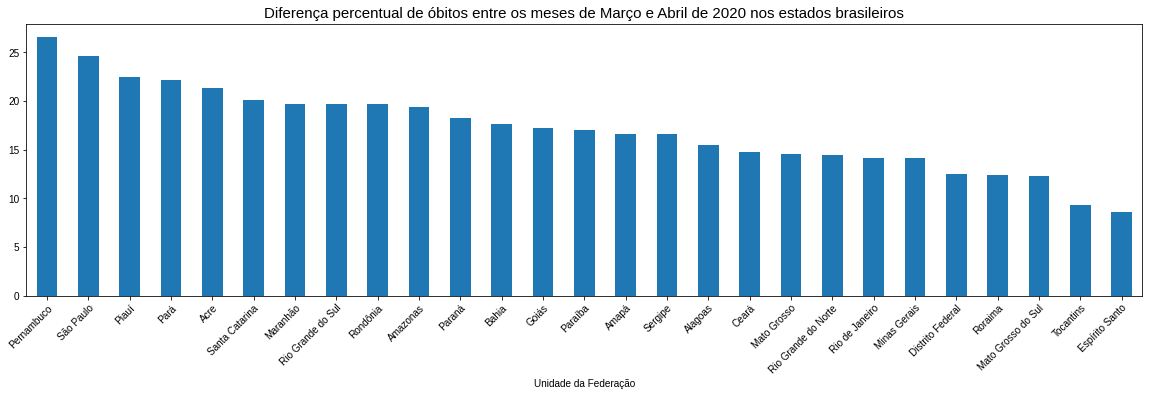

In [20]:
dif_mar_abr['diferenca_em_porcentagem'].plot(kind="bar", figsize=(20,5))
plt.style.use("seaborn")
plt.title("Diferença percentual de óbitos entre os meses de Março e Abril de 2020 nos estados brasileiros", fontsize=15)
plt.xticks(rotation=45, ha="right", rotation_mode='anchor')

In [21]:
# Todos os estados apresentam uma queda significativa do mês de março para abril de 2020 que se manteve nos meses seguintes.
# Uma possível explicação para a queda pode ser a menor circulação de pessoas nas ruas, com a implementação de lockdown nos estados.
# Um exemplo disso é a diminuição nas mortes em acidente de trânsito: http://www.respeitoavida.sp.gov.br/estado-tem-semestre-com-menor-numero-de-fatalidades-de-transito-desde-2015/